<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; background-color:blue; color:white; font-size:1.7rem ">
        <b>  Groupe 1 </b>
    </div>
</div>


<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; color:blue; font-size:1.7rem ">
        <b> PROJET MACHINE LEARNING II  </b>
    </div>
</div>


</div>
<h1 style = "text-align:center;color:tomato;font-family:century;font-size:35px;">Bank churn scoring</h1>

- #### Jean Pierre Adiouma NDIAYE
- #### Durel Valdes NZIALI TCHAMOU
- #### Dieynaba KA

# <font color='blue'> Introduction </font>

Le taux de désabonnement des clients est un défi majeur pour les banques, car il réduit leurs revenus et leurs parts de marché. Il est également coûteux et difficile d’acquérir de nouveaux clients que de fidéliser les clients existants. Par conséquent, les banques doivent comprendre les facteurs qui influencent le taux de désabonnement des clients et développer des stratégies pour l’éviter.

# <font color='blue'> Objectif </font>

L’objectif de ce projet est de créer un modèle d’apprentissage automatique capable de prédire avec précision le taux de désabonnement des clients et de fournir des informations sur les caractéristiques des clients susceptibles de quitter la banque. Le modèle aidera la banque à cibler ses clients à risque et à leur offrir des incitations ou des solutions personnalisées pour les fidéliser. Le modèle aidera également la banque à améliorer ses produits et services en fonction des commentaires et des préférences de ses clients. L’objectif est de construire un modèle d’apprentissage automatique capable d’identifier les clients susceptibles de quitter la banque. Cela peut aider la banque à fidéliser ses précieux clients et à augmenter ses revenus.

Ce notebook a pour objet de présenter l'analyse exploratoire mis au propre et annoté.

#  <font color='blue'> 1. Importations des libraries </font>

In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from imblearn.over_sampling import ADASYN
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score
import pickle
np.random.seed(22)
#-------------------------------------------------------------------------------------------------------------------------------
pd.set_option('display.max_columns', None )
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 2. Importation des données

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Documents\\ISE2\\projet_ML2_groupe1_2024\\data\\train.csv", usecols = lambda x: x not in ["id", 'CustomerId', 'Surname'])
df.head(100)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
95,588,Germany,Male,30.0,10,126683.40,1,1.0,1.0,131636.55,0
96,659,Spain,Female,39.0,0,107042.74,1,1.0,0.0,102284.20,1
97,743,Spain,Male,43.0,2,161807.18,2,0.0,1.0,93228.86,0
98,639,Germany,Female,43.0,7,123873.52,1,1.0,1.0,51113.17,0


In [3]:
print(df.shape)

(165034, 11)


- Au départ c'était un dataset de 165034 lignes et 14 colonnes. Mais comme vous l'avez constaté nous avons supprimé les colonnes "id", 'CustomerId', 'Surname' qui ne sont pas pertinentes pour notre étude de classification. 

L'ensemble de données sur l'attrition de la clientèle bancaire est un ensemble de données couramment utilisé pour prédire l'attrition de la clientèle dans le secteur bancaire. Il contient des informations sur les clients des banques qui ont quitté la banque ou qui restent clients. L'ensemble de données comprend les attributs suivants :

1. Customer ID: Un identifiant unique pour chaque client
2. Surname: Nom de famille du client
3. Credit Score: Valeur numérique représentant la cote de crédit du client.
4. Geography: Le pays où le client réside (France, Espagne ou Allemagne)
5. Gender: Le sexe du client (homme ou femme)
6. Age: L'âge du client
7. Tenure: Le nombre d'années d'ancienneté du client dans la banque
8. Balance: Le solde du compte du client
9. NumOfProducts: Le nombre de produits bancaires utilisés par le client (par exemple, compte d'épargne, carte de crédit)
10. HasCrCard: Le client possède-t-il une carte de crédit (1 = oui, 0 = non) ?
11. IsActiveMember: Si le client est un membre actif (1 = oui, 0 = non)
12. EstimatedSalary: Le salaire estimé du client
13. Exited: Si le client s'est désabonné (1 = oui, 0 = non)

`CustomerId` and `Surname` sont généralement des caractéristiques non informatives lors de l'apprentissage du modèle pour la compréhension du comportement.

# 3. EDA

## 3.1 Statistiques descriptives

###   3.1.1 Cherchons les variables catégorielles et les variables numériques

In [44]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=3
                        and col not in "Exited"]

categorical_variables

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [45]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >3
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [46]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
5%,524.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,21198.390000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
90%,754.000000,50.000000,9.000000,139959.050000,2.000000,1.000000,1.000000,176843.530000,1.000000
95%,787.000000,56.000000,9.000000,151671.550000,2.000000,1.000000,1.000000,183490.270000,1.000000


### 3.1.2 NaN values

In [47]:
df.isnull().sum().to_frame().T

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,0,0,0,0,0,0


Nous remarquons qu'il n'y a pas de valeurs maquantes dans notre dataset. Par contre, nous avons remarqué des valeurs dupliquées.

In [48]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14256,595,Spain,Male,35.0,8,0.00,1,0.0,1.0,100015.79,0
14736,535,France,Male,33.0,3,133040.32,1,1.0,1.0,110299.78,0
21512,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
27134,532,France,Male,36.0,4,0.00,1,1.0,1.0,132798.78,0
30350,731,France,Male,43.0,2,0.00,2,1.0,1.0,170034.95,0
...,...,...,...,...,...,...,...,...,...,...,...
163101,749,France,Male,49.0,1,139290.41,1,1.0,0.0,182855.42,0
163785,589,Spain,Male,45.0,1,0.00,2,0.0,0.0,125939.22,0
164350,614,Spain,Male,66.0,2,0.00,2,1.0,1.0,180082.70,0
164596,682,France,Male,37.0,5,0.00,2,1.0,1.0,112554.68,0


### 3.1.3 Exited ( Variable dépendante)

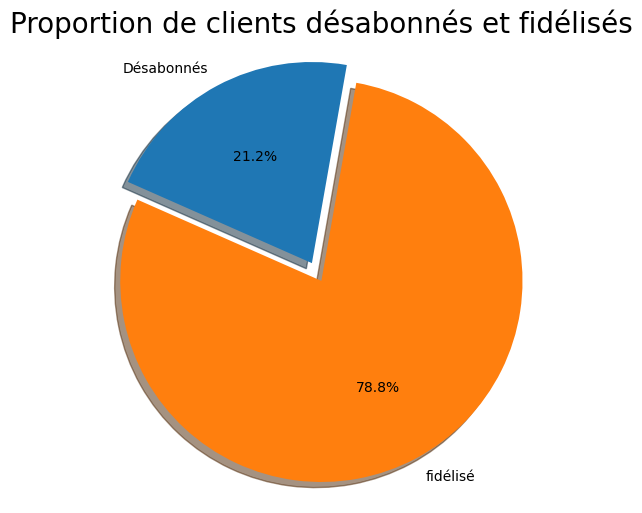

In [49]:
labels =  'Désabonnés', 'fidélisé'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
ax1.axis('equal')
plt.title("Proportion de clients désabonnés et fidélisés", size = 20)
plt.show()

Dans cette étude, nous remarquons qu'il y a une prédominance de clients étant resté fidèle à la banque. Pour mieux faciliter nos analyses, nous avons fait sortir des statistiques par groupe(ceux qui se sont désabonnés et ceux qui sont toujours abonnés). C'est ce qui justifie les commandes suivantes:

In [50]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [51]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

### 3.1.4  Statistiques descriptives des Variables catégorielles

En regardant nos variables catégorielles individuellement, nous avons pu vérifier que notre base a une prédominance de la population française, nous avons une légère quantité d'hommes plus que de femmes, en regardant la variable tenure nous pouvons voir que nous avons une bonne distribution prenant les valeurs 0 et 10. Nous pouvons également vérifier que la plupart des transactions sont faites par carte de crédit, lorsque nous regardons notre variable target nous pouvons voir que nous avons beaucoup plus de clients restés fidèles que de désabonnés.


#### 3.1.4.1 Geography

In [52]:
aa = pd.crosstab(df.Geography, df.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"La probabilité d'avoir des clients résidant en  {i} est approximativement", round(aa.loc[i].values[1]/s, 3))

La probabilité d'avoir des clients résidant en  France est approximativement 0.165
La probabilité d'avoir des clients résidant en  Germany est approximativement 0.379
La probabilité d'avoir des clients résidant en  Spain est approximativement 0.172


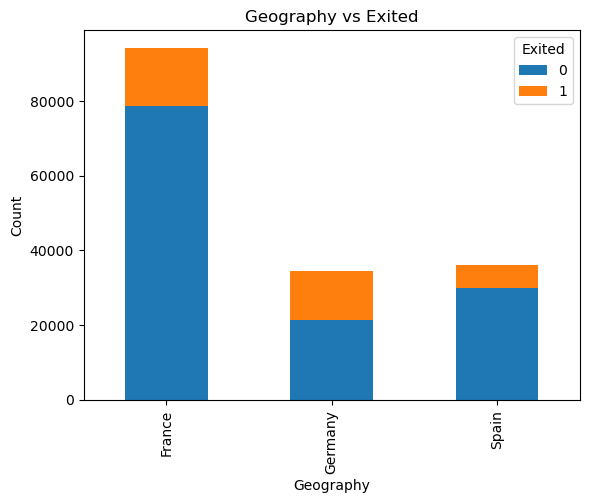

In [53]:
# Tracer le graphique
aa.plot(kind='bar', stacked=True)

# Ajouter des labels et un titre
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography vs Exited')
plt.legend(title='Exited')

# Afficher le graphique
plt.show()

#### 3.1.4.2 Gender(Genre)

In [54]:
aa = pd.crosstab(df.Gender, df.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"La probabilité d'avoir des clients de sexe {i} est approximativement", round(aa.loc[i].values[1]/s, 3))

La probabilité d'avoir des clients de sexe Female est approximativement 0.28
La probabilité d'avoir des clients de sexe Male est approximativement 0.159


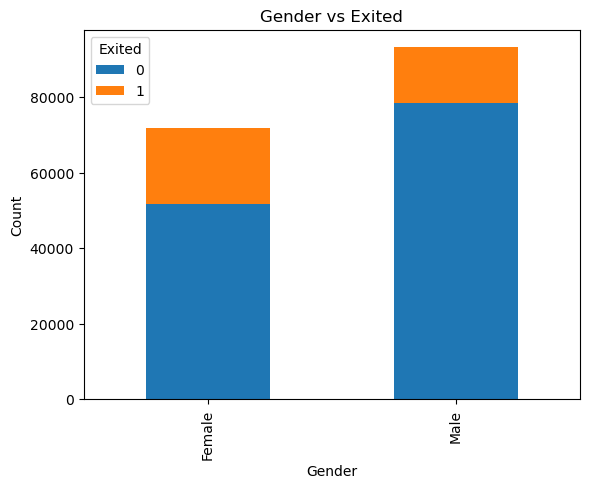

In [55]:
# Tracer le graphique
aa.plot(kind='bar', stacked=True)

# Ajouter des labels et un titre
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Exited')
plt.legend(title='Exited')

# Afficher le graphique
plt.show()

#### 3.1.4.3 IsActiveMember

In [56]:
aa = pd.crosstab(df.IsActiveMember, df.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    if i == 0:
        j = 'non actifs'
    else:
        j = 'actifs'
    print(f"La probabilité d'avoir des clients {j} est approximativement", round(aa.loc[i].values[1]/s, 3))
# print(f"The probability of {j} users to churn is approximately", round(aa.loc[i].values[1]/s, 3))

La probabilité d'avoir des clients non actifs est approximativement 0.297
La probabilité d'avoir des clients actifs est approximativement 0.125


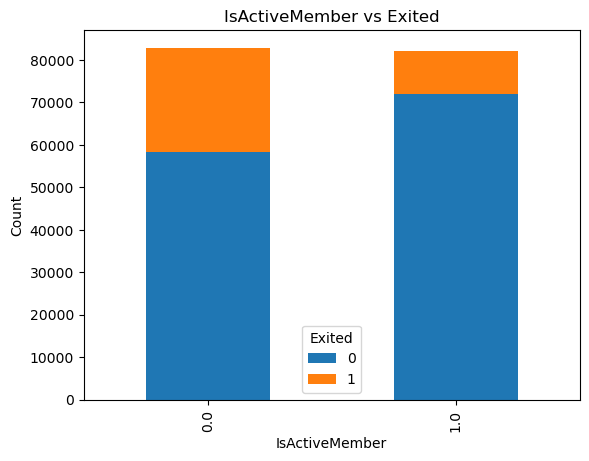

In [57]:
aa.plot(kind='bar', stacked=True)

# Ajouter des labels et un titre
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('IsActiveMember vs Exited')
plt.legend(title='Exited')

# Afficher le graphique
plt.show()

#### 3.1.4.4 HasCrCard

In [58]:
aa = pd.crosstab(df.HasCrCard, df.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    if i == 0:
        j = 'sans'
    else:
        j = 'avec'
    print(f"La probabilité d'avoir des clients {j} carte de crédit(s) est approximativement", round(aa.loc[i].values[1]/s, 3))

La probabilité d'avoir des clients sans carte de crédit(s) est approximativement 0.227
La probabilité d'avoir des clients avec carte de crédit(s) est approximativement 0.206


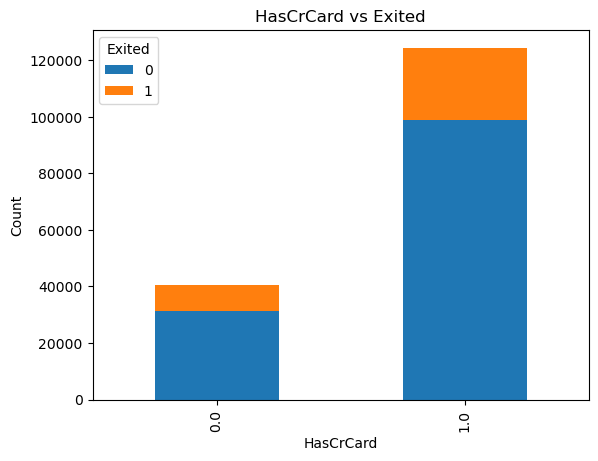

In [59]:
# Ajouter des labels et un titre
aa.plot(kind='bar', stacked=True)
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('HasCrCard vs Exited')
plt.legend(title='Exited')
# Afficher le graphique
plt.show()

Pour les clients disposant de la carte de crédit, 22.7 % se sont désabonnés de la banque. Parmi ceux n'en disposant pas, 20.6 % se sont désabonné.

### 3.1.5 Statistiques descriptives des Variables numériques

Si l'on examine nos variables numériques, on constate que notre variable credit_score présente pratiquement une distribution normale, que la plupart des personnes de notre base ont entre 20 et 40 ans, qu'un grand nombre de personnes n'ont aucune valeur dans le bilan, et que la variable « salaire » présente des valeurs bien réparties. En regardant la variable product_number nous pouvons voir que nous avons une prédominance dans les produits 1 et 2

#### 3.1.5.1 NumOfProducts

In [60]:
aa = pd.crosstab(df.NumOfProducts, df.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"La probabilité d'avoir des clients avec {i} produit(s) de churning est approximativement", round(aa.loc[i].values[1]/s, 3))

La probabilité d'avoir des clients avec 1 produit(s) de churning est approximativement 0.347
La probabilité d'avoir des clients avec 2 produit(s) de churning est approximativement 0.06
La probabilité d'avoir des clients avec 3 produit(s) de churning est approximativement 0.883
La probabilité d'avoir des clients avec 4 produit(s) de churning est approximativement 0.876


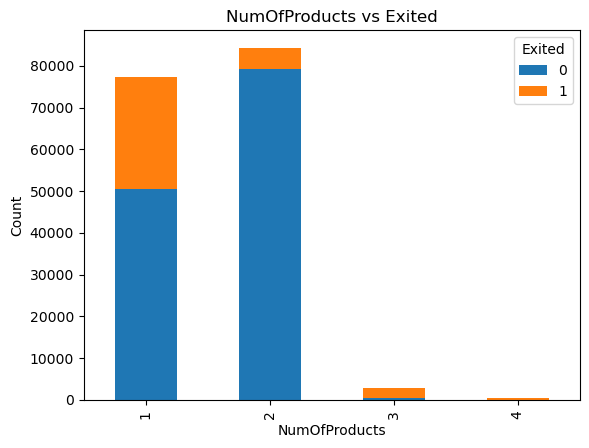

In [61]:
# Ajouter des labels et un titre
aa.plot(kind='bar', stacked=True)
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('NumOfProducts vs Exited')
plt.legend(title='Exited')
# Afficher le graphique
plt.show()

#### 3.1.5.2  Crédit Score

##### Pour le groupe des abonnés

In [62]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    130113.000000
mean        657.590710
std          79.785902
min         350.000000
5%          525.000000
25%         599.000000
50%         662.000000
75%         711.000000
90%         754.000000
95%         787.000000
99%         850.000000
max         850.000000
Name: CreditScore, dtype: float64

L'observation des résultats montre que le crédit score moyen pour les personnes s'étant abonnés est de 657,59.

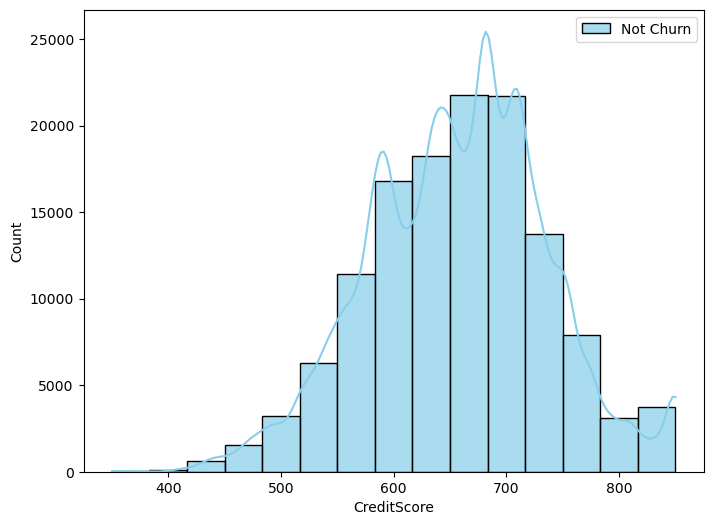

In [63]:
# distribution of the Credit Score for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
#plt.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
sns.histplot(data=not_churn, x='CreditScore', bins=15, kde=True, color='skyblue', alpha=0.7,label='Not Churn')
plt.legend(loc='upper right')
plt.show()

La distribution est presque normale. On note un léger décalage vers la droite en la comparant avec une distribution normale.

##### Pour le groupe des désabonnés

In [64]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    34921.000000
mean       652.220469
std         81.136331
min        350.000000
5%         523.000000
25%        593.000000
50%        651.000000
75%        708.000000
90%        753.000000
95%        786.000000
99%        850.000000
max        850.000000
Name: CreditScore, dtype: float64

L'observation des résultats montre que le crédit score moyen pour les personnes s'étant désabonnés est de 652,22. Elle est légérement plus faible que celui correspondant aux clients fidels de la Banque.

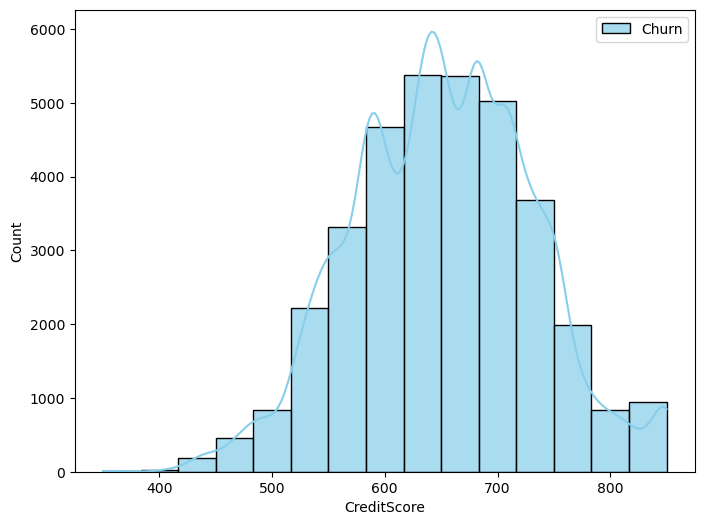

In [65]:
# distribution of the Credit Score for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
#plt.hist(churn["CreditScore"],bins=15, alpha=0.7, density=True,  label='Churn')
sns.histplot(data=churn, x='CreditScore', bins=15, kde=True, color='skyblue', alpha=0.7,label='Churn')
plt.legend(loc='upper right')
plt.show()

#### 3.1.5.3 Age

##### Pour le groupe des abonnés

In [66]:
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    130113.000000
mean         36.560480
std           8.147944
min          18.000000
5%           26.000000
25%          31.000000
50%          36.000000
75%          40.000000
90%          46.000000
95%          51.000000
99%          66.000000
max          92.000000
Name: Age, dtype: float64

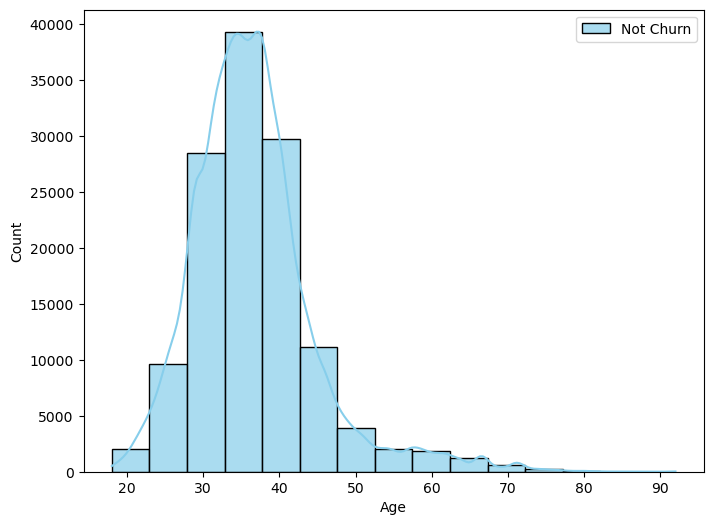

In [67]:
# distribution of the Age for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Age')
#plt.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
sns.histplot(data=not_churn, x='Age', bins=15, kde=True, color='skyblue', alpha=0.7,label='Not Churn')
plt.legend(loc='upper right')
plt.show()

##### Pour le groupe des désabonnés

In [68]:
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    34921.000000
mean        43.958478
std          9.004380
min         18.000000
5%          29.000000
25%         38.000000
50%         44.000000
75%         50.000000
90%         56.000000
95%         59.000000
99%         65.000000
max         92.000000
Name: Age, dtype: float64

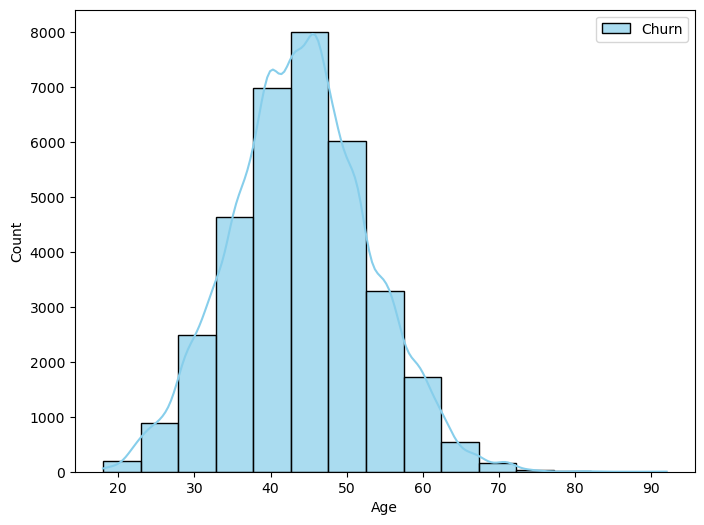

In [69]:
# distribution of the Age for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Age')
#plt.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
sns.histplot(data=churn, x='Age', bins=15, kde=True, color='skyblue', alpha=0.7,label='Churn')
plt.legend(loc='upper right')
plt.show()

#### 3.1.5.4 EstimatedSalary

##### Pour les abonnés

In [70]:
not_churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    130113.000000
mean     112084.293725
std       50214.655044
min          11.580000
5%        20955.030000
25%       74425.410000
50%      116977.890000
75%      153727.320000
90%      176763.270000
95%      183358.210000
99%      196257.680000
max      199992.480000
Name: EstimatedSalary, dtype: float64

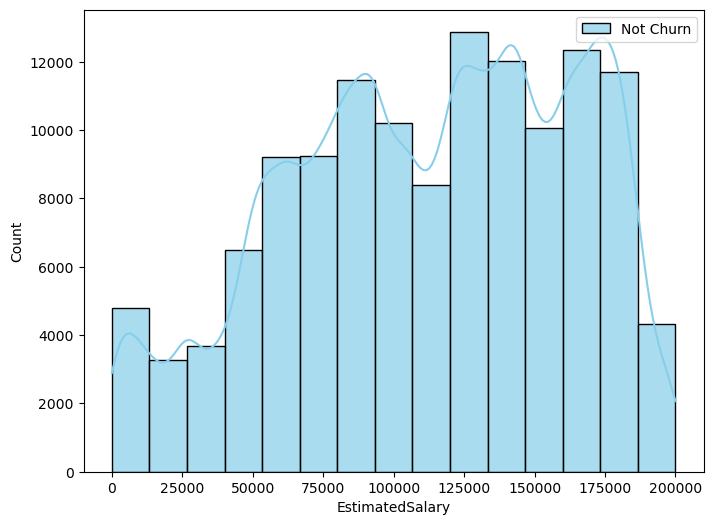

In [71]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
#plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.8, label='Not Churn')
sns.histplot(data=not_churn, x='EstimatedSalary', bins=15, kde=True, color='skyblue', alpha=0.7,label='Not Churn')
plt.legend(loc='upper right')
plt.show()

##### Pour les désabonnés

In [72]:
churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     34921.000000
mean     114402.496656
std       50542.030878
min          11.580000
5%        22074.480000
25%       74965.440000
50%      120892.960000
75%      158750.530000
90%      177378.660000
95%      183584.040000
99%      195104.910000
max      199992.480000
Name: EstimatedSalary, dtype: float64

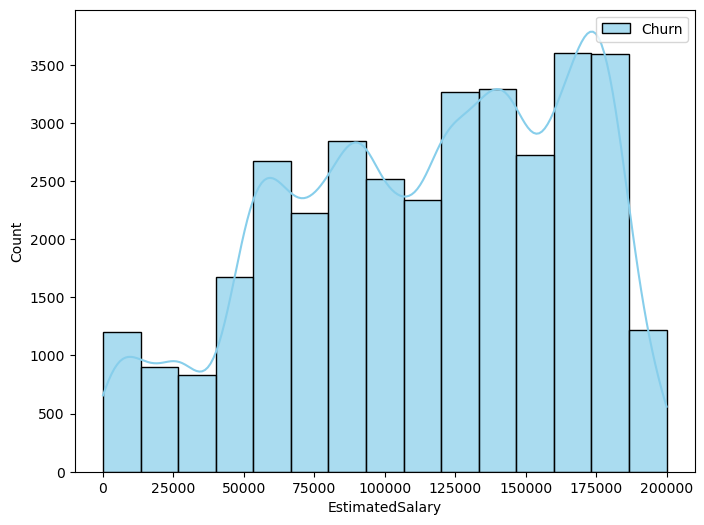

In [73]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
#plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.8, label='Not Churn')
sns.histplot(data=churn, x='EstimatedSalary', bins=15, kde=True, color='skyblue', alpha=0.7,label='Churn')
plt.legend(loc='upper right')
plt.show()

#### 3.1.5.5 Balance

##### Pour les abonnés

In [74]:
not_churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    130113.000000
mean      51255.807752
std       62189.978970
min           0.000000
5%            0.000000
25%           0.000000
50%           0.000000
75%      116858.660000
90%      139432.530000
95%      150902.270000
99%      171913.870000
max      250898.090000
Name: Balance, dtype: float64

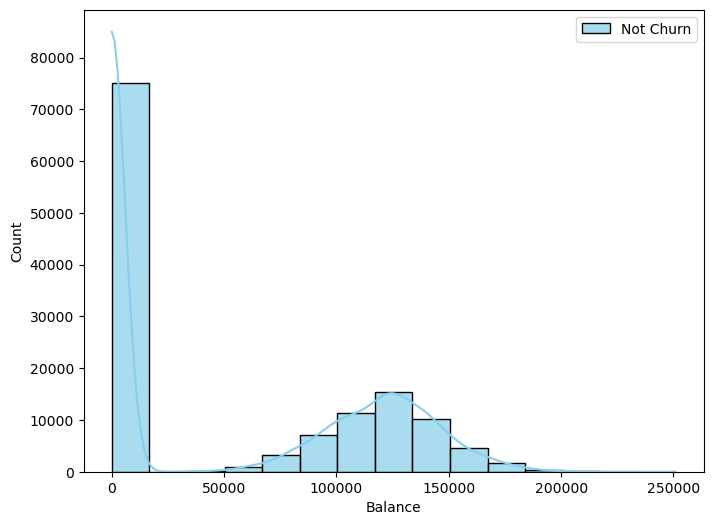

In [75]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
# plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.8, label='Not Churn')
sns.histplot(data=not_churn, x='Balance', bins=15, kde=True, color='skyblue', alpha=0.7,label='Not Churn')
plt.legend(loc='upper right')
plt.show()

La distribution est presque normale. On note également une forte proportion de clients toujours abonnéss ayant un solde nul.

##### Pour les désabonnés

In [76]:
churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     34921.000000
mean      71209.978085
std       62646.691947
min           0.000000
5%            0.000000
25%           0.000000
50%       98955.870000
75%      125437.140000
90%      141827.330000
95%      152760.240000
99%      174851.900000
max      238387.560000
Name: Balance, dtype: float64

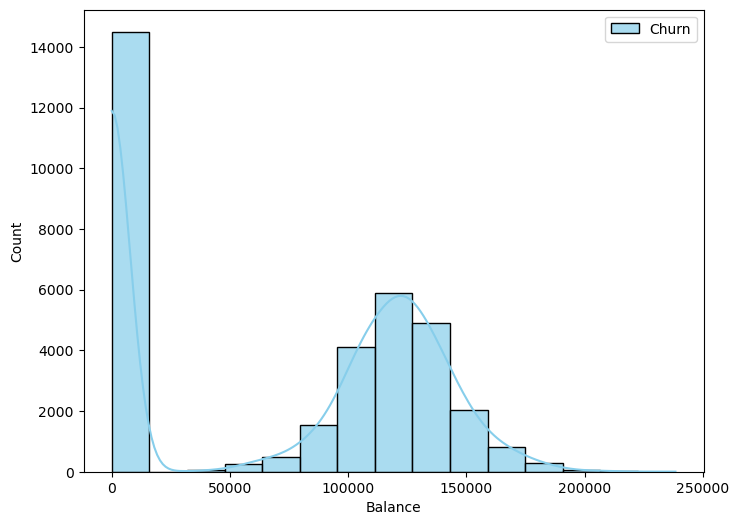

In [77]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
# plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.8, label='Not Churn')
sns.histplot(data=churn, x='Balance', bins=15, kde=True, color='skyblue', alpha=0.7,label='Churn')
plt.legend(loc='upper right')
plt.show()

La distribution est presque normale. On note également une forte proportion de clients qui ont abandonné ayant un solde nul.

#### 3.1.5.5 Tenure

In [78]:
df[['Tenure', 'Geography']].dtypes

Tenure        int64
Geography    object
dtype: object

Regardons d'abord les valeurs que peut prendre la variable Tenure.

In [79]:
print('Les valeurs uniques:', list(np.sort(df.Tenure.unique())))

Les valeurs uniques: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Donc, les cleints ont une ancienneté de 0 à 10ans.

Visualisons pour chaque valeurs, le nombre de clients.

Text(0, 0.5, 'Count')

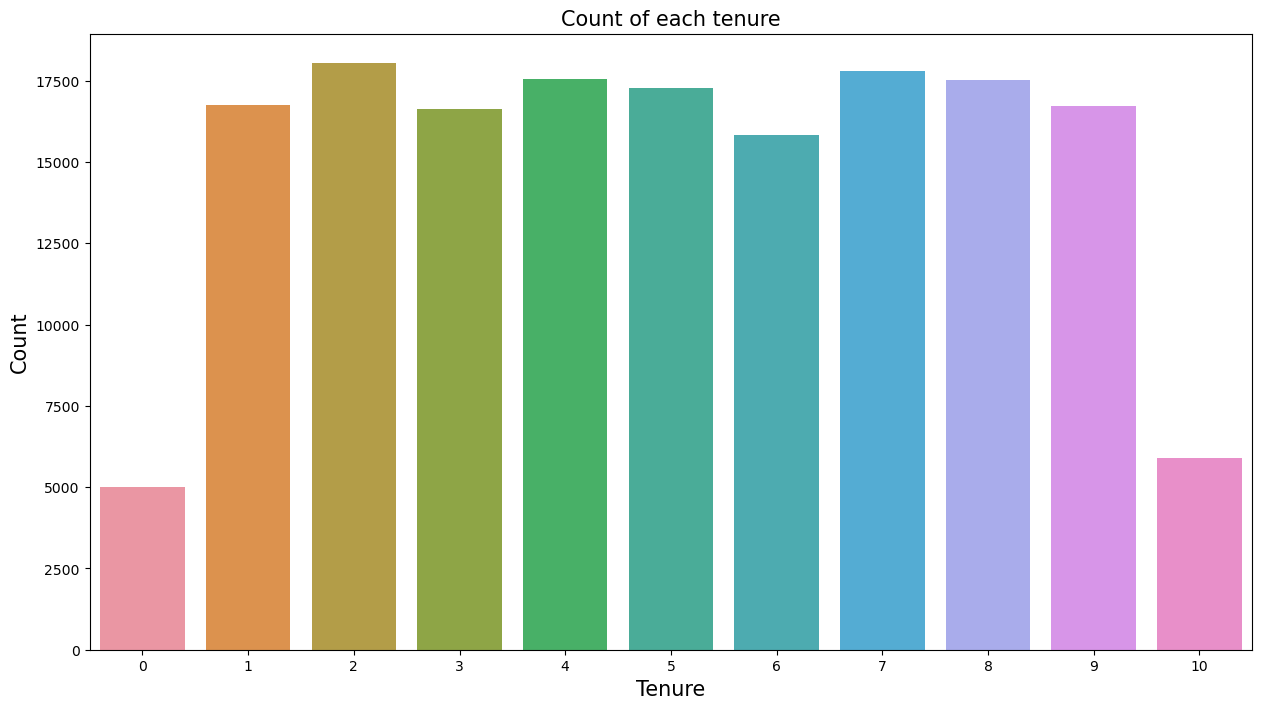

In [80]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

De façon globale, on remarque que les clients ont une ancienneté similaire. Par contre il y'a peu de personnes qui ont une ancienneté de 0 ou 10ans. 

#### 3.1.6 Statistique bivariée

In [84]:
from scipy.stats import chi2_contingency
chi2_array, p_array = [], []
for column in categorical_variables:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_variables,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
0,Geography,7358.673765,0.000000e+00
3,IsActiveMember,7293.408511,0.000000e+00
1,Gender,3538.452550,0.000000e+00
2,HasCrCard,80.780230,2.522693e-19


#### 3.1.7 Etude de l'Asymétrie

In [85]:
df[numeric_variables].skew()

CreditScore       -0.059291
Age                0.968063
Tenure             0.006490
Balance            0.382020
NumOfProducts      0.368278
EstimatedSalary   -0.309022
dtype: float64

On a donc une asymétrie positive concernat les variables Age, Balance, NumOfProducts. Elle est très proche de 0 avec la variable Tenure. Par contre, on note une asymétrie négartive concernant les variables. 

Nous allons à présent voir la distribution des variables numériques selon la variable Exited.

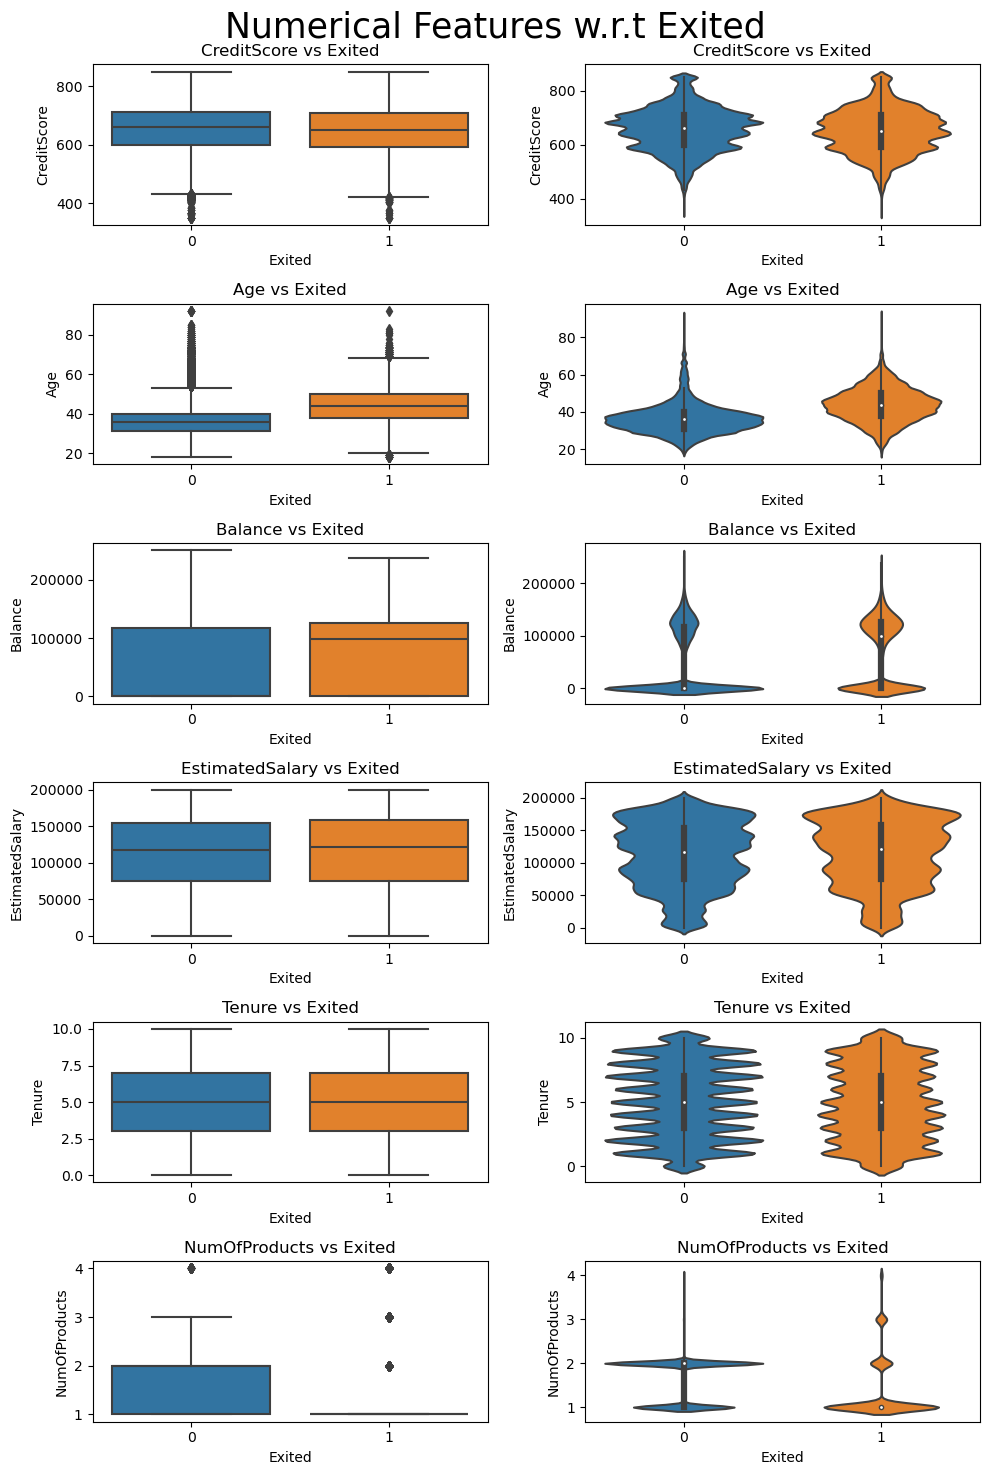

In [86]:
num_features2 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure','NumOfProducts']
fig, axes = plt.subplots(nrows = 6, ncols = 2,figsize = (10,15))
for i, j in enumerate(num_features2):
    ax = sns.boxplot(x = 'Exited',y = j, data = df, ax = axes[i, 0])
    title = j + ' vs Exited'
    axes[i, 0].set_title(title)
    
    ax = sns.violinplot(x = 'Exited',y = j, data = df, ax = axes[i, 1])
    title = j + ' vs Exited'
    axes[i, 1].set_title(title)
fig.suptitle('Numerical Features w.r.t Exited', fontsize = 25)
plt.tight_layout()
plt.show()

Les résultats montrent: 
- Ce sont les personnes agées qui quittent le plus .
- il ne semble pas avoir de corellation entre l'ancienneté et le fait de quitter.
- On note certains changements chez les clients dont le solde atteint 250000.
- Il ne semble pas y avoir de corrélation entre le salaire estimé et le fait de se désabonner.

### 3.1.7 Matrice de corrélation

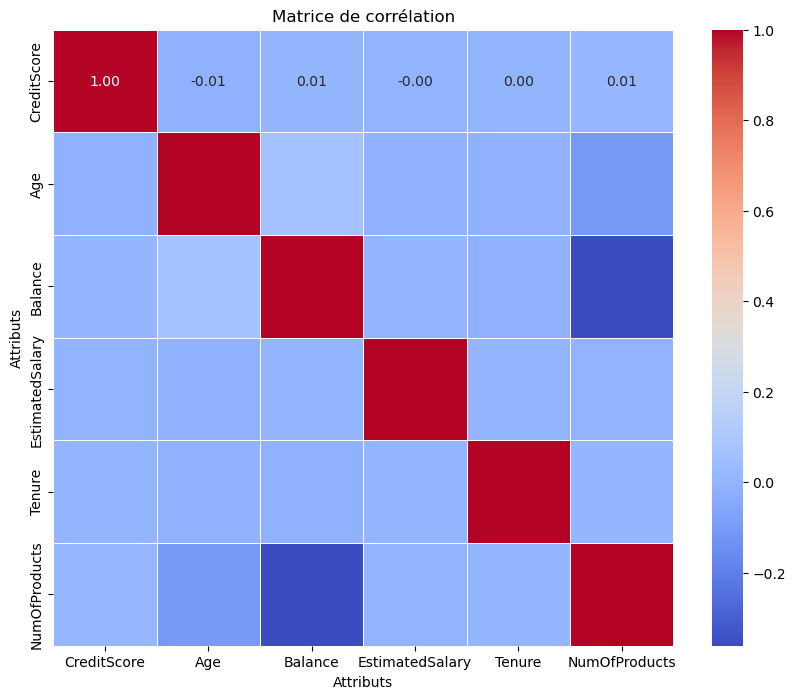

In [87]:
df_numeric=df.loc[:,num_features2]
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add titles and labels as needed
plt.title('Matrice de corrélation')
plt.xlabel('Attributs')
plt.ylabel('Attributs')
plt.show()

On remaque qu'il existe une corellation négative entre les variables IsActiveMember, NumOfproducts et la variable cible EXited.
Il existe également une corellation positive entre la variable cible et les variables Balance et Age.
Les autres corellations observées ne sont pas significatives.

A présent, nous allons voir les distributions en considérant le jeu de données global. C'est à dire nous n'allons pas séparer en fonction de la variable target.

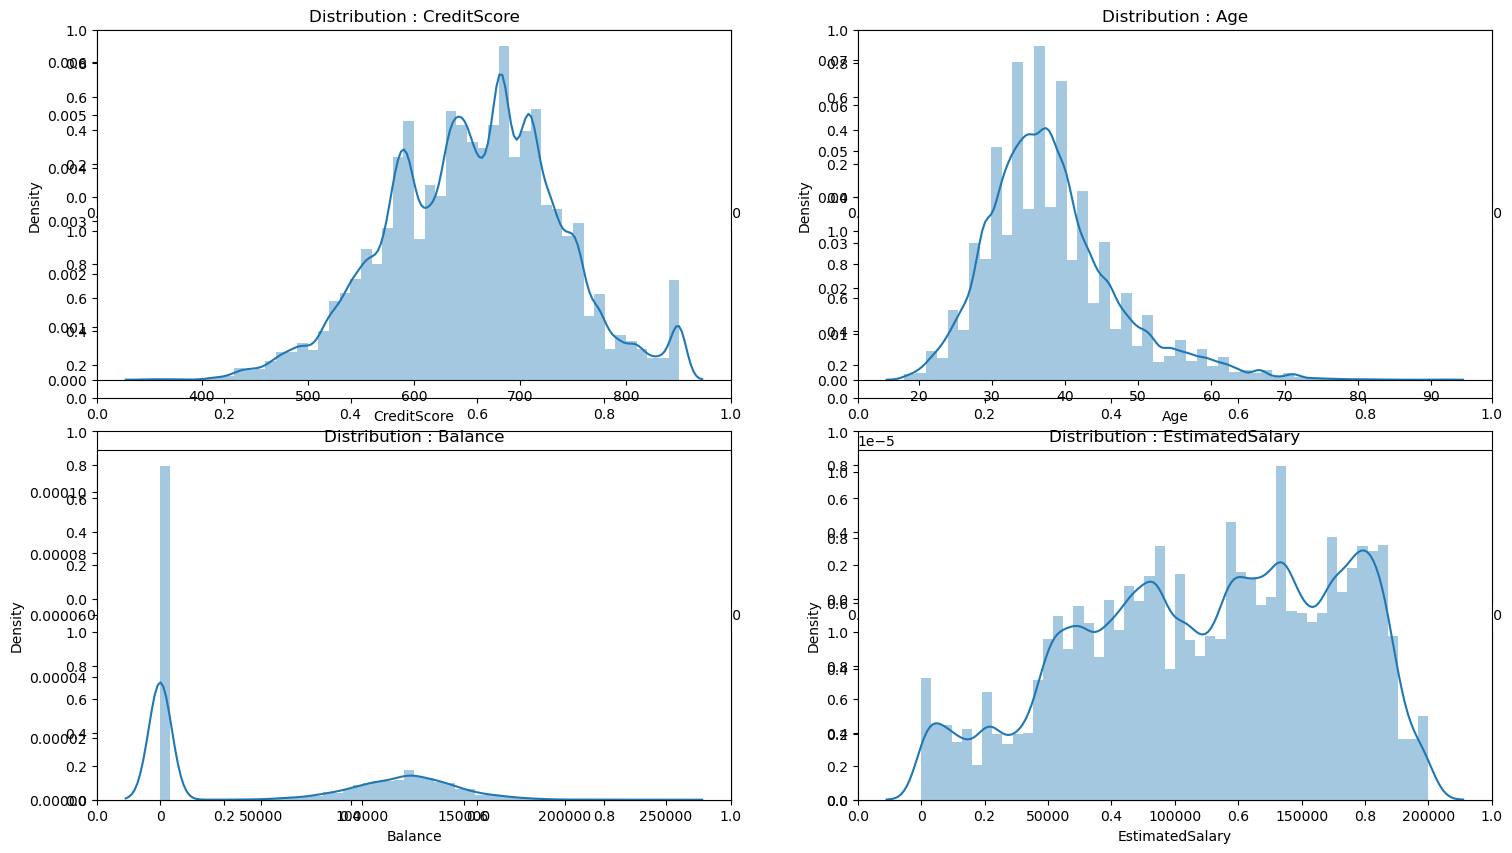

In [88]:
num_features3 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', ]
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (18,10))
for i, j in enumerate(num_features3):
    plt.subplot(2,2,i+1)
    sns.distplot(df[j])
    plt.title('Distribution : ' + j)

## Supprimer les valeurs manquantes et les duplications

In [89]:
df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

Exportations du dataset

In [90]:
df.to_csv('train_modele.csv', index=False)

C'est à partir de ce dataset que nous allons appliquer le préprocessing. 

<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; background-color:blue; color:white; font-size:1.7rem ">
        <b>  ACP </b>
    </div>
</div>


## Les librairies nécessaires

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [23]:
data = pd.read_csv("C:\\Users\\DELL\\Documents\\ISE2\\projet_ML2_groupe1_2024\\data\\train.csv" )
df = data.copy()
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


**L'analyse en composantes principales** (ACP ou PCA en anglais pour principal component analysis), ou, selon le domaine d'application, transformation de Karhunen–Loève (KLT) ou transformation de Hotelling, est une méthode de la famille de l'analyse des données qui consiste à transformer des variables liées entre elles (dites « corrélées » en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales » ou axes principaux. Elle permet de résumer l'information en réduisant le nombre de variables.

Il s'agit d'une approche à la fois géométrique (les variables étant représentées dans un nouvel espace, selon des directions d'inertie maximale) et statistique (la recherche portant sur des axes indépendants expliquant au mieux la variabilité — la variance — des données). Lorsqu'on veut compresser un ensemble de 𝑁 variables aléatoires, les 𝑛 premiers axes de l'analyse en composantes principales sont un meilleur choix, du point de vue de l'inertie ou de la variance.

L'outil mathématique est appliqué dans d'autres domaines que les statistiques et est parfois appelé **décomposition orthogonale aux valeurs propres ou POD** (anglais :proper orthogonal decomposition)

## Imputation et Normalisation des données

### Imputation par la mediane

In [26]:
# Sélection des variables numériques
data1 = data
data1 = data1.drop('id', axis=1)
#data1 = data1.drop('RowNumber', axis=1)
data1 = data1.drop('CustomerId', axis=1)
data1 = data1.drop('Exited', axis=1)
num_vars = data1.select_dtypes(include=['int64', 'float64']).columns
X = data[num_vars]
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

### Normalisation

Si l'on souhaite une ACP normée, il nous faut standardiser les données, avec la fonction scale() du sous-module preprocessing. Bien évidemment, il faut passer que des variables quantitatives, sans données manquantes.

In [27]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled

array([[ 0.14413459, -0.57807434, -0.71997339, ...,  0.57126293,
        -0.99555021,  1.36948561],
       [-0.36770579, -0.57807434, -1.43269365, ...,  0.57126293,
         1.00446968, -1.25408471],
       [ 0.2689737 ,  0.21135385,  1.77454751, ...,  0.57126293,
        -0.99555021,  1.4374223 ],
       ...,
       [-1.14170832, -0.80362525, -0.00725313, ...,  0.57126293,
         1.00446968,  0.2953656 ],
       [-1.27903135, -0.9164007 ,  0.70546712, ..., -1.75050742,
         1.00446968, -0.82321653],
       [ 2.41620652, -0.80362525, -1.43269365, ...,  0.57126293,
        -0.99555021, -1.01392487]])

## Modélisation de l'ACP

In [28]:
# ACP
# pca = PCA(n_components=3)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 1.19488794, -1.21536079, -0.10388294, ..., -0.35963955,
         0.35072854, -0.03475771],
       [ 1.38795619,  0.83410951,  1.15073205, ...,  0.39432768,
        -0.94044685, -0.09500572],
       [ 1.060681  , -1.65794111, -1.178674  , ...,  0.34378109,
         1.21645794,  0.03506654],
       ...,
       [ 0.21234365, -0.3058906 ,  0.50981085, ...,  0.91578255,
        -1.33689143, -1.39851685],
       [-1.52650292,  1.10047093,  0.41521356, ..., -0.7019216 ,
        -1.95341198,  0.33592799],
       [ 0.07108806,  0.18291052, -1.03557583, ..., -1.33499923,
         0.28226198, -1.41245026]])

- L'objet pca comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (explained_variance_, proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [29]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.40098255 1.03428764 1.00494978 0.99847324 0.99366635 0.97537964
 0.9569437  0.63536557]
[0.17512176 0.12928517 0.12561796 0.1248084  0.12420754 0.12192172
 0.11961724 0.07942021]


- Un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées

In [30]:
Var = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(8)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
Var

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.400983,18.0,18.0
1,Dim2,1.034288,13.0,30.0
2,Dim3,1.004950,13.0,43.0
3,Dim4,0.998473,12.0,55.0
4,Dim5,0.993666,12.0,68.0
5,Dim6,0.975380,12.0,80.0
6,Dim7,0.956944,12.0,92.0
7,Dim8,0.635366,8.0,100.0


### Choix des dimensions

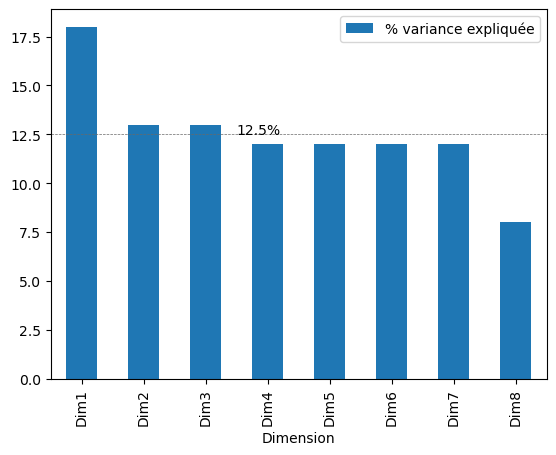

In [31]:
Var.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(2.5, 12.5, "12.5%") # ajout de texte
plt.axhline(y = 12.5, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 12.5 = 100 / 8 (nb dimensions)
plt.show()

**On retient les *trois premières* dimensions**

## Représentation des individus

### Regroupement des dimensions choisis avec les variables de catégorisations

In [32]:
# Transformation en DataFrame pandas
pca_df = pd.DataFrame({
    "Dim1" : X_pca[:,0], 
    "Dim2" : X_pca[:,1],
    "Dim3" : X_pca[:,2],
    'Exited' : data['Exited'],
    "Geography" : data["Geography"],
    "Gender" : data["Gender"]
})

# Résultat (premières lignes)
pca_df.head(2)

,Dim1,Dim2,Dim3,Exited,Geography,Gender
0,1.194888,-1.215361,-0.103883,0,France,Male
1,1.387956,0.834110,1.150732,0,France,Male


In [33]:
print(pca_df.isnull().sum())

Dim1         0
Dim2         0
Dim3         0
Exited       0
Geography    0
Gender       0
dtype: int64


In [34]:
# Imputation par le mode pour la variable "Geography"
imputery = SimpleImputer(strategy='most_frequent')
pca_df = imputery.fit_transform(pca_df)

In [35]:
pca_df = pd.DataFrame({
    "Dim1" : pca_df[:,0], 
    "Dim2" : pca_df[:,1],
    "Dim3" : pca_df[:,2],
    'Exited' : pca_df[:,3],
    "Geography" : pca_df[:,4],
    "Gender" : pca_df[:,5]
})

# Résultat (premières lignes)
pca_df.head()

,Dim1,Dim2,Dim3,Exited,Geography,Gender
0,1.194888,-1.215361,-0.103883,0,France,Male
1,1.387956,0.83411,1.150732,0,France,Male
2,1.060681,-1.657941,-1.178674,0,France,Male
3,-1.479164,0.347756,0.896749,0,France,Male
4,1.470228,1.003109,-0.196481,0,Spain,Male


*Nous avons donc une base possédant les dimensions qui expliquent au mieux le phénomène et avec nos variables catégorielles*

### Visualisation 2D des individus par rapport à la fidelité des clients

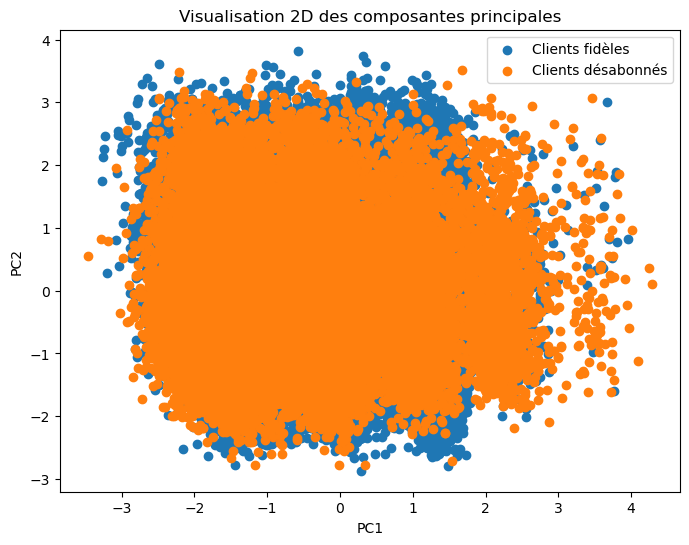

In [36]:
# Visualisation 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_df.loc[pca_df['Exited'] == 0, 'Dim1'], 
            pca_df.loc[pca_df['Exited'] == 0, 'Dim2'], 
            label='Clients fidèles')
plt.scatter(pca_df.loc[pca_df['Exited'] == 1, 'Dim1'],
            pca_df.loc[pca_df['Exited'] == 1, 'Dim2'],
            label='Clients désabonnés')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation 2D des composantes principales')
plt.legend()
plt.show()

- Au vue de ce graphe l'on pourrait croire que les caracteristiques ne nous permettent pas de segmenté ceux des clients fideles et les clients infidèles. il est donc naturel de s'interroger sur une visualisation 3D

### Visualisation 3D des individus par rapport à la fidelité des clients

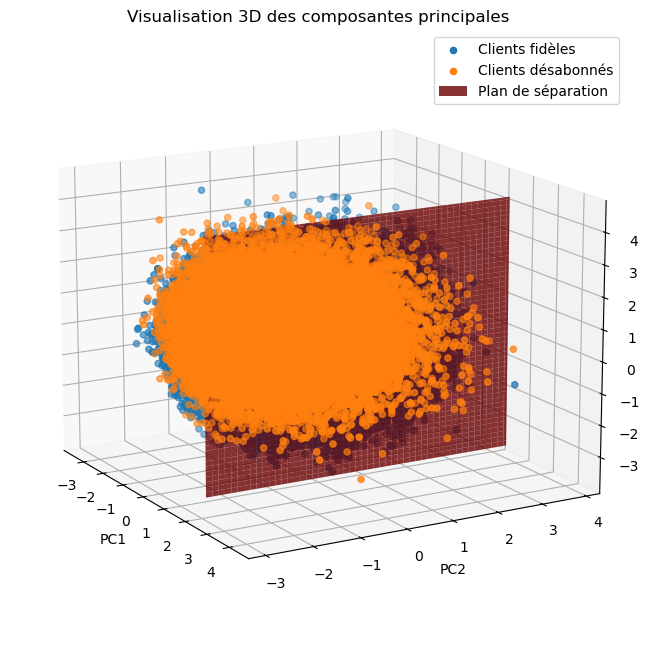

In [37]:
# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.loc[pca_df['Exited'] == 0, 'Dim1'], 
           pca_df.loc[pca_df['Exited'] == 0, 'Dim2'],
           pca_df.loc[pca_df['Exited'] == 0, 'Dim3'],
           label='Clients fidèles')
ax.scatter(pca_df.loc[pca_df['Exited'] == 1, 'Dim1'],
           pca_df.loc[pca_df['Exited'] == 1, 'Dim2'], 
           pca_df.loc[pca_df['Exited'] == 1, 'Dim3'],
           label='Clients désabonnés')
# Tracé d'un plan separation
x = np.linspace(pca_df['Dim2'].min(), pca_df['Dim2'].max(), 100)
y = np.linspace(pca_df['Dim3'].min(), pca_df['Dim3'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = 1.9*np.ones_like(X)  
ax.plot_surface(Z, X, Y, alpha=0.8, color='r', label='Plan de séparation')

ax.view_init(elev=15, azim=-30)
#ax.view_init(elev=45, azim=-30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualisation 3D des composantes principales')
plt.legend()
plt.show()


- Cette représentation des individus en trois dimensions nous permet de remarque l'on peut au vue des trois premieres composantes separer les individus qui presentent les caracteristiques spécifiques qui nous permettent des les caracteriser. Cependant les données sont presentés sur trois pays il est donc logique de se demander si les comportements sont les mêmes dans les pays.

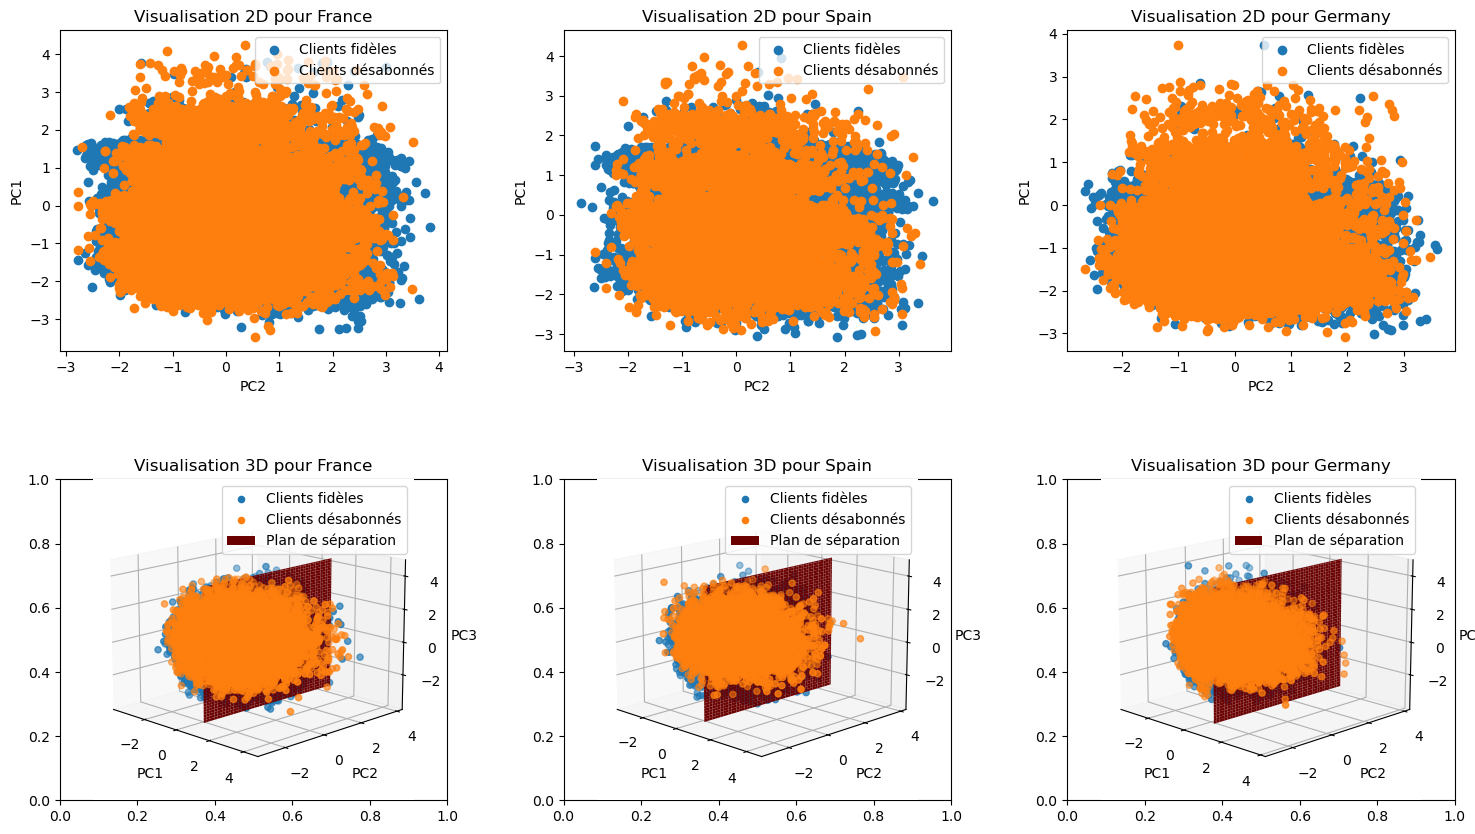

In [38]:
# Nombre de pays uniques
num_countries = len(pca_df['Geography'].unique())

# Création de la figure avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Itération sur les pays
for i, country in enumerate(pca_df['Geography'].unique()):
    # Visualisation 2D
    row, col = 0, i % 3
    ax = axes[row, col]
    ax.scatter(pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 0), 'Dim2'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 0), 'Dim1'],
               label='Clients fidèles')
    ax.scatter(pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 1), 'Dim2'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 1), 'Dim1'],
               label='Clients désabonnés')
    ax.set_xlabel('PC2')
    ax.set_ylabel('PC1')
    ax.set_title(f'Visualisation 2D pour {country}')
    ax.legend()

   # Visualisation 3D par pays
for i, country in enumerate(pca_df['Geography'].unique()):
    row, col = 1, i % 3
    ax = fig.add_subplot(2, 3, 4 + i, projection='3d')
    ax.scatter(pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 0), 'Dim1'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 0), 'Dim2'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 0), 'Dim3'],
               label='Clients fidèles')
    ax.scatter(pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 1), 'Dim1'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 1), 'Dim2'],
               pca_df.loc[(pca_df['Geography'] == country) & (pca_df['Exited'] == 1), 'Dim3'],
               label='Clients désabonnés')
    # Tracé d'un plan separation
    x = np.linspace(pca_df['Dim2'].min(), pca_df['Dim2'].max(), 100)
    y = np.linspace(pca_df['Dim3'].min(), pca_df['Dim3'].max(), 100)
    X, Y = np.meshgrid(x, y)
    Z = 1.08*np.ones_like(X)  
    ax.plot_surface(Z, X, Y, alpha=1, color='r', label='Plan de séparation')

    ax.view_init(elev=15, azim=-45)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Visualisation 3D pour {country}')
    ax.legend()

# Ajustement de l'espacement entre les graphiques
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()



On peut remarquer que le comportement des individus ne varie pas selon le pays. En effet que tu sois résidant en allemagne , en espagne ou encore en france, les caracteristique qui permettent de dire si un individu va se desabonner ou non reste les memes que dans une observation globale. une question serait donc de savoir si le comportement pourrait changer selon si l'on est un homme ou une femme?

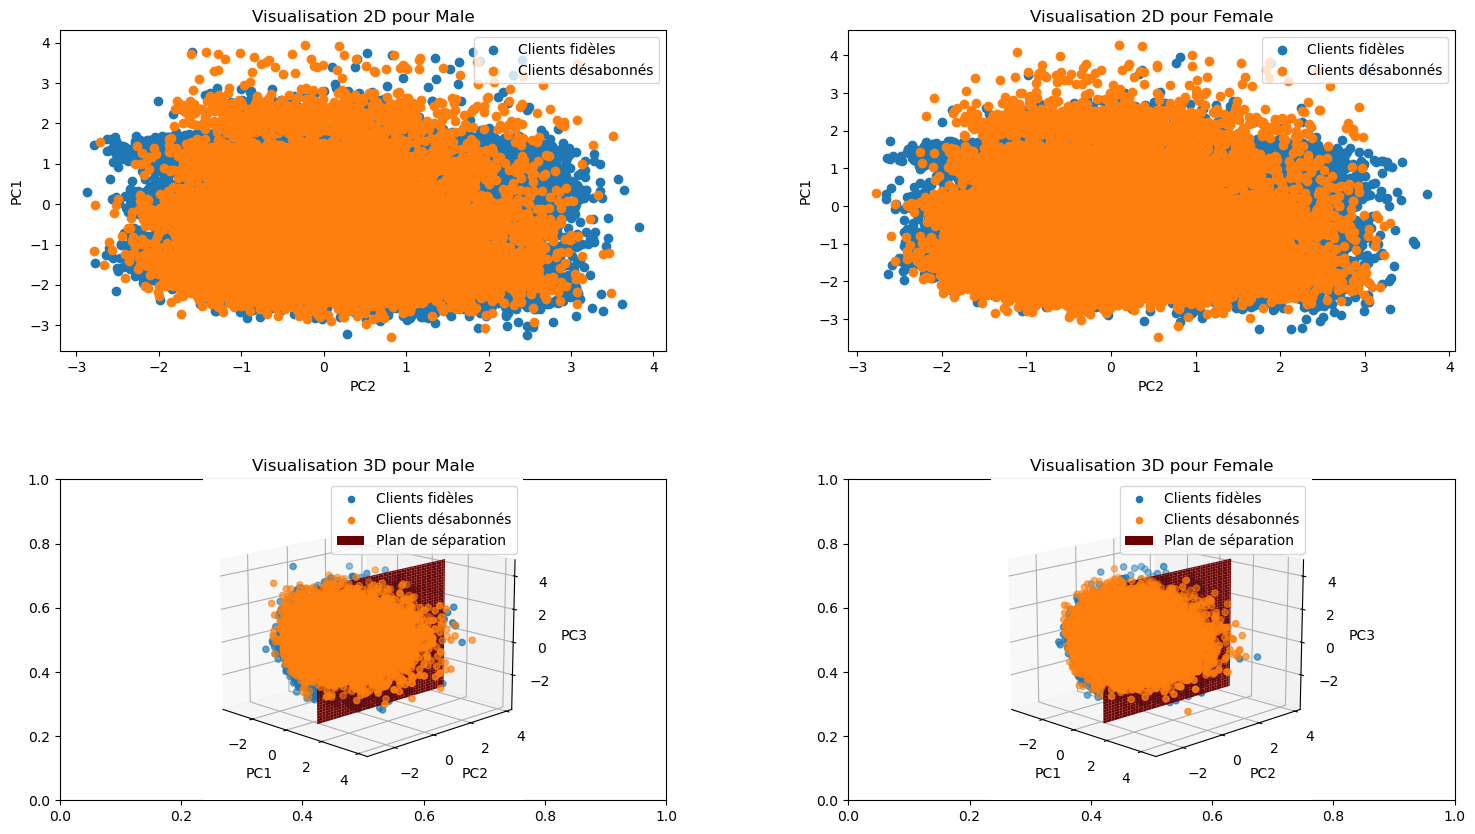

In [39]:
# Nombre de genre
num_Gender = len(pca_df['Gender'].unique())

# Création de la figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Itération sur les pays
for i, Gender in enumerate(pca_df['Gender'].unique()):
    # Visualisation 2D
    row, col = 0, i % 3
    ax = axes[row, col]
    ax.scatter(pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 0), 'Dim2'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 0), 'Dim1'],
               label='Clients fidèles')
    ax.scatter(pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 1), 'Dim2'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 1), 'Dim1'],
               label='Clients désabonnés')
    ax.set_xlabel('PC2')
    ax.set_ylabel('PC1')
    ax.set_title(f'Visualisation 2D pour {Gender}')
    ax.legend()

   # Visualisation 3D par pays
for i, Gender in enumerate(pca_df['Gender'].unique()):
    row, col = 1, i % 2
    ax = fig.add_subplot(2, 2, 3 + i, projection='3d')
    ax.scatter(pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 0), 'Dim1'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 0), 'Dim2'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 0), 'Dim3'],
               label='Clients fidèles')
    ax.scatter(pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 1), 'Dim1'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 1), 'Dim2'],
               pca_df.loc[(pca_df['Gender'] == Gender) & (pca_df['Exited'] == 1), 'Dim3'],
               label='Clients désabonnés')
    # Tracé d'un plan separation
    x = np.linspace(pca_df['Dim2'].min(), pca_df['Dim2'].max(), 100)
    y = np.linspace(pca_df['Dim3'].min(), pca_df['Dim3'].max(), 100)
    X, Y = np.meshgrid(x, y)
    Z = 1.2*np.ones_like(X)  
    ax.plot_surface(Z, X, Y, alpha=1, color='r', label='Plan de séparation')

    ax.view_init(elev=15, azim=-45)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Visualisation 3D pour {Gender}')
    ax.legend()

# Ajustement de l'espacement entre les graphiques
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Force est de constater que le comportement des clients varie suivant le sexe de celui-ci. En effet, par rapport au plan de séparation(qui change lorsqu'on fait une séparation par genre) les clients vue de facon globale qui sont succeptible de se desabonner resterait abonner si ceux ci etaient observé en tenant en compte leur genre.

## Représentation des variables 

Lorsqu'on réalise une ACP, surtout dans un contexte exploratoire, il est absolument nécessaire de décrire les axes à partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le cercle des corrélations. 

### Représentation des variables au niveau globale

#### Présentation des correlations des variables aux axes

In [41]:
n = X_scaled.shape[0] # nb individus
p = X_scaled.shape[1] # nb variables
eigval = ((n-1) / n )* pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': num_vars, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1], 'COR_3': corvar[:,2]})
coordvar

,id,COR_1,COR_2,COR_3
0,CreditScore,0.020299,0.301292,-0.776574
1,Age,-0.334175,0.202235,0.273226
2,Tenure,0.041672,-0.251722,-0.472156
3,Balance,-0.788057,0.009756,-0.120211
4,NumOfProducts,0.807403,0.042871,0.048994
5,HasCrCard,0.052323,-0.572266,-0.074175
6,IsActiveMember,0.104754,0.654165,-0.093189
7,EstimatedSalary,-0.022527,-0.286162,-0.270660


#### Cercle de correlations

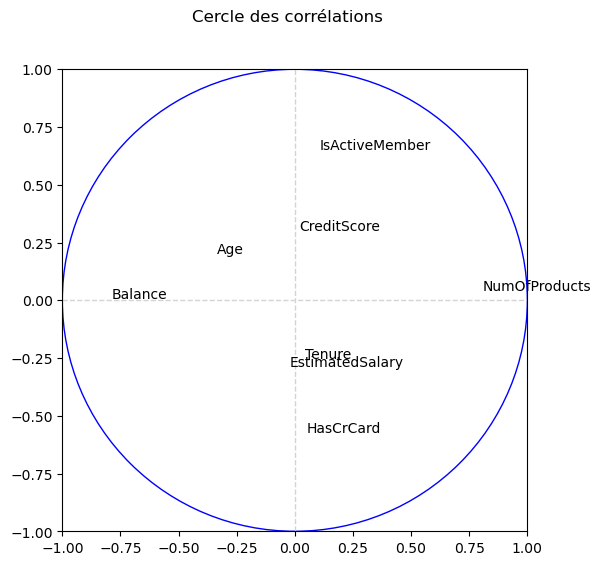

In [42]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

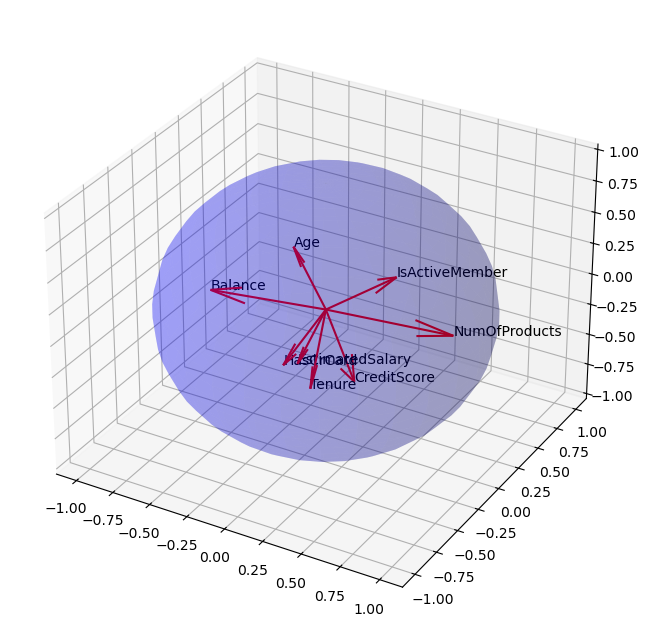

In [43]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Ajout des noms des variables
for j in range(p):
    ax.quiver(0, 0, 0, coordvar["COR_1"][j], coordvar["COR_2"][j], coordvar["COR_3"][j], color='r')
    ax.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["COR_3"][j], coordvar["id"][j])
# Ajout de la sphère
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:30j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="b", alpha=0.2)
plt.show()

### Représentation des variables suivant les clients qui se desabonnent

In [44]:
# pour les clients qui se désabonnent
# Sélection des variables numériques
data1 = data
#data1 = data1.drop('RowNumber', axis=1)
data1 = data1.drop('id', axis=1)
data1 = data1.drop('CustomerId', axis=1)
data2 = data1[~(data1['Exited'] == 1)]
data2 = data2.drop('Exited', axis=1)
num_vars = data2.select_dtypes(include=['int64', 'float64']).columns
X1 = data2[num_vars]
imputer = SimpleImputer(strategy='median')
X1_imputed = imputer.fit_transform(X1)
# Normalisation des données
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1_imputed)

pca1 = PCA()
X_pca = pca1.fit_transform(X_scaled1)
n = X_scaled1.shape[0] # nb individus
p = X_scaled1.shape[1] # nb variables
eigval1 = ((n-1) / n )* pca1.explained_variance_ # valeurs propres
sqrt_eigval1 = np.sqrt(eigval1) # racine carrée des valeurs propres
corvar1 = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar1[:,k] = pca1.components_[k,:] * sqrt_eigval1[k]
# on modifie pour avoir un dataframe
coordvar1 = pd.DataFrame({'id': num_vars, 'COR1_1': corvar1[:,0], 'COR1_2': corvar1[:,1], 'COR1_3': corvar1[:,2]})
coordvar1

,id,COR1_1,COR1_2,COR1_3
0,CreditScore,-0.010221,0.047944,-0.675257
1,Age,-0.135587,0.697559,-0.012854
2,Tenure,0.022706,-0.085609,-0.702244
3,Balance,-0.850090,-0.091218,-0.007828
4,NumOfProducts,0.849645,0.094781,0.004597
5,HasCrCard,0.050767,-0.215378,-0.012170
6,IsActiveMember,-0.071172,0.710333,0.029806
7,EstimatedSalary,-0.002264,-0.190339,0.229696


In [45]:
print(pca1.explained_variance_) 
print(pca1.explained_variance_ratio_) 

[1.47121206 1.10071873 1.00317036 0.99977278 0.99800281 0.99175189
 0.89985334 0.5355795 ]
[0.18390009 0.13758878 0.12539533 0.12497064 0.12474939 0.12396803
 0.1124808  0.06694692]


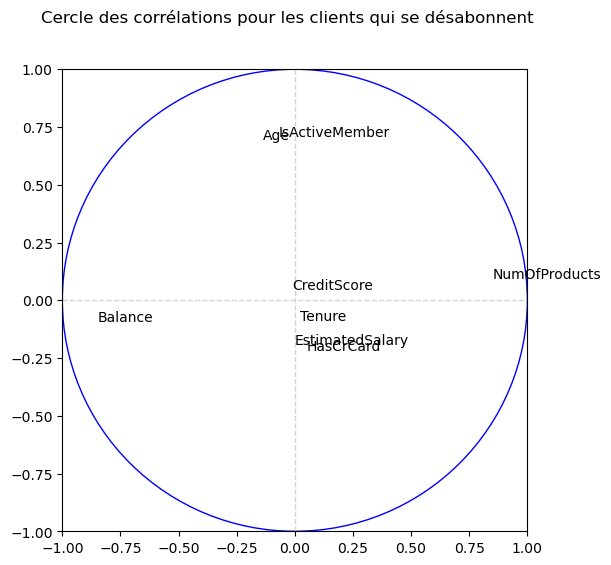

In [47]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations pour les clients qui se désabonnent")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar1["COR1_1"][j],coordvar1["COR1_2"][j], coordvar1["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

D'après les résultats de l'analyse en composantes principales, le profil des clients qui risquent de se désabonner se decline comme suit :

*Faible activité bancaire*
- L'axe 1 est fortement corrélé négativement avec *Balance* (-0.850) et positivement avec *NumOfProducts* (0.850). Cela suggère que les clients ayant un faible solde bancaire et n'utilisant que peu de produits de la banque sont plus susceptibles de se désabonner.

*Clients plus jeunes*
- L'axe 2 est fortement corrélé positivement avec *Age* (0.698). Un score faible sur cet axe correspond donc à des clients plus jeunes, qui sont plus enclins à se désabonner.

*Revenu estimé plus élevé*
- Bien que la corrélation soit plus faible, l'axe 3 est positivement corrélé avec *EstimatedSalary* (0.230). Un score élevé sur cet axe pourrait indiquer un revenu plus élevé, ce qui semble contre-intuitif pour le désabonnement.

**En résumé**, *le profil des clients les plus à risque de se désabonner semble être les clients plus jeunes, avec une faible activité bancaire (peu de produits, faible solde), malgré un revenu potentiellement plus élevé.*


### Représentation des variables pour les client qui restent abonnées

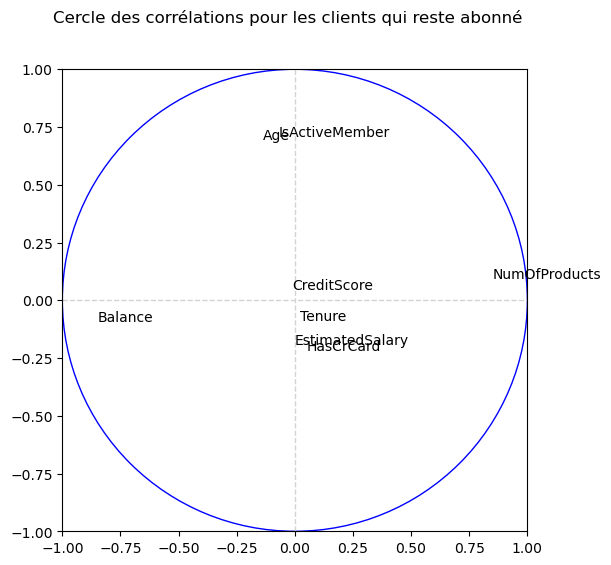

In [46]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations pour les clients qui reste abonné")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar1["COR1_1"][j],coordvar1["COR1_2"][j], coordvar1["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

D'après les résultats de l'analyse en composantes principales, voici le profil des clients qui restent abonnés

*Client fidèle et actifs*

- L'axe 1 est fortement corrélé positivement avec "IsActiveMember" (0.643), indiquant des clients actifs dans leurs opérations bancaires. Il est également corrélé négativement avec "HasCrCard" (-0.658), suggérant que les clients sans carte de crédit sont plus enclins à rester abonnés

*Clients plus âgés*

- L'axe 2 est fortement corrélé négativement avec "Age" (-0.643), indiquant que les clients plus âgés ont tendance à rester abonnés

*Solde bancaire élevé*

- L'axe 3 est fortement corrélé négativement avec "Balance" (-0.741), ce qui suggère que les clients avec un solde bancaire élevé sont moins susceptibles de se désabonner

**En résumé**, *le profil typique des clients restant abonnés semble être des clients plus âgés, actifs dans leurs opérations bancaires, sans carte de crédit et avec un solde bancaire élevé. Ces caractéristiques indiquent une relation bancaire stable et durable*

# Preprocessing ?

- Cette partie a été réalisée grace aux pipelines en amont dans le notebook dédié au modelling. Nous vous invitons à l'ouvrir.